# Maps with Cartopy

## Importing Libraries and Data

In [25]:
import pandas as pd
import numpy as np
import datetime
import dateutil.parser as dparser


"ASTROPY"
from astropy.time import Time
from astropy.table import Table
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, get_sun
import astropy.units as u

"CARTOPY"
import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade

"MATPLOTLIB"
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm

mpl.rcParams['font.family'] = 'Latin Modern Roman'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 2

In [26]:
ephemeris = pd.read_csv("../ephemeris2.csv")

In [27]:
continents = ['Africa',	'Antarctica','Asia','Australia','Europe','North America','South America',
              'Arctic Ocean','Atlantic Ocean','Indian Ocean','Pacific Ocean']
radio = []

for continent in continents:
  try:
    cont = pd.read_excel("../AllRadiotelescopes.xlsx",sheet_name=continent,index_col=0)
    radio.append(cont)
  except:
    pass

## Create Trajectory

In [28]:
def get_lon(TIME,RA):
  """
  Gets the longitude that will be under the asteroid at every moment
  """
  T = Time(TIME,format='jd')
  G = T.sidereal_time('apparent', 'greenwich').to(u.deg)
  return RA - G.value

maxlons = get_lon(ephemeris['datetime_jd'],ephemeris['RA'])
maxlats = ephemeris['DEC']
deltas = ephemeris['delta (Rt)']

for i in range(len(maxlons)):
  if maxlons[i] < -180: maxlons[i] += 360

for i in range(len(maxlons)-1):
  if maxlons[i+1] > maxlons[i]:
    j = i + 1

def add_nan(array,idx):
    """
    Adds a np.nan in the location idx to split the path into two.
    """
    return list(array[:idx])+[np.nan]+list(array[idx:])

maxlons = add_nan(maxlons,j) #np.insert(maxlons,j,[-180])
maxlats = add_nan(maxlats,j) #np.insert(maxlats,j,[maxlats[j]])
deltas = add_nan(deltas,j) # np.insert(deltas,j,[deltas[j]])


C:\Users\agustin.vallejo\AppData\Local\Continuum\anaconda3\envs\apophis\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utcut1" yielded 200 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
C:\Users\agustin.vallejo\AppData\Local\Continuum\anaconda3\envs\apophis\lib\site-packages\erfa\core.py:154: ErfaWarning: ERFA function "utctai" yielded 200 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [41]:
def draw(ax,t,i):
    date = dparser.parse(ephemeris['datetime_str'][t])
    labels = ['a','b','c','d']
    ax.set_global()
    ax.coastlines()
    # ax.stock_img()
    ax.add_feature(Nightshade(date, alpha=0.2))
    ax.set_title(
        "({}) {} UT \n Distance: {:.1f} $R_\oplus$".format(
        labels[i], str(ephemeris['datetime_str'][t]), ephemeris['delta (Rt)'][t]),
        size=15)

    # Contorno blanco
    plt.plot(maxlons,maxlats,'b-',lw=5,transform=data_crs)
    plt.plot(maxlons[t],maxlats[t],'bo',ms=15,transform=data_crs)

    # Relleno azul
    plt.plot(maxlons,maxlats,'w-',lw=2,transform=data_crs)
    plt.plot(maxlons[t],maxlats[t],'wo',ms=12,transform=data_crs)

    for rad in radio:
        for r,row in rad.iterrows():
            plt.plot(row.Longitude,row.Latitude,'r*',ms=8,transform=data_crs)
            # plt.annotate(str(r),(row.Longitude+5,row.Latitude),size=10)

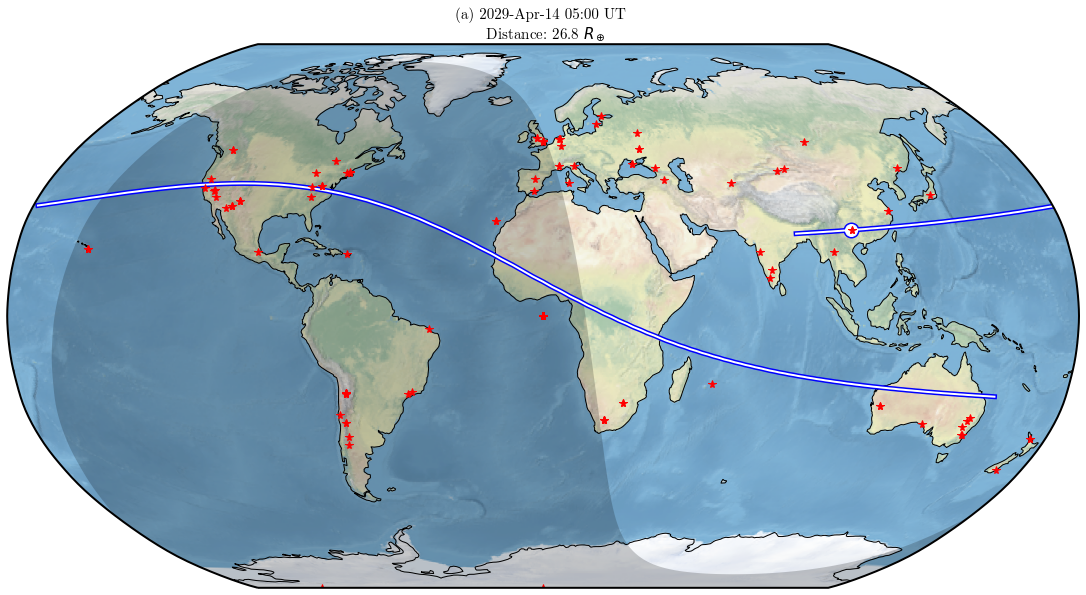

In [38]:
data_crs = ccrs.Geodetic()

t = ephemeris['delta'].idxmin()
t = int(0.93*len(ephemeris))

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
draw(ax,t,0)

'lmroman10-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


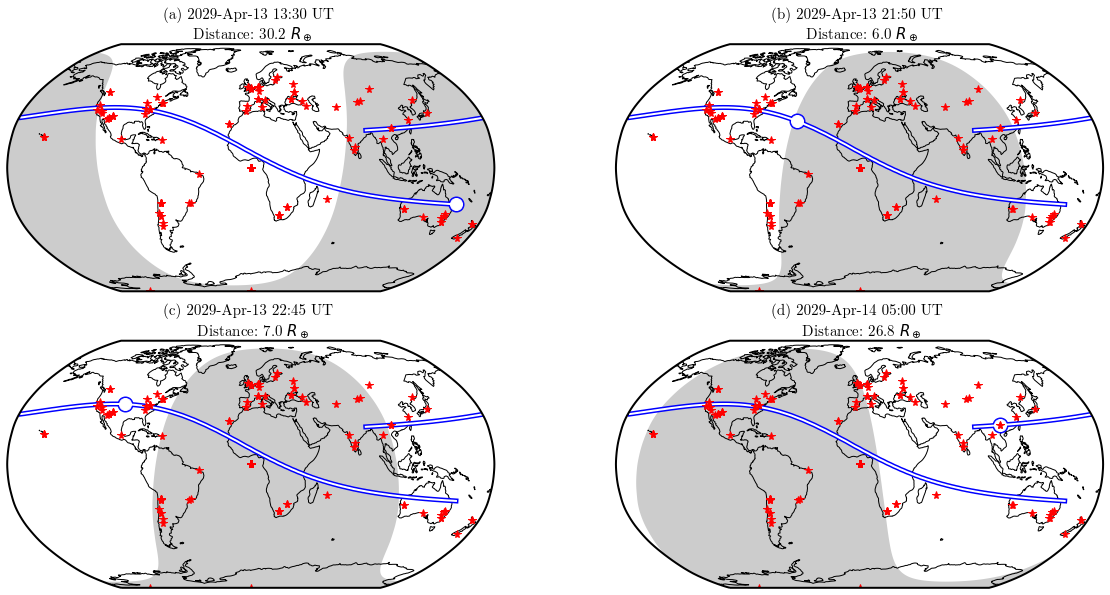

In [42]:
data_crs = ccrs.Geodetic()

t = ephemeris['delta'].idxmin()
t = int(0.9*len(ephemeris))
date = dparser.parse(ephemeris['datetime_str'][t])

fig = plt.figure(figsize=(20, 10))
N = 4
ts = [0,0.5,0.555,0.93]
for i in range(N):
    ax = fig.add_subplot(2, 2, i+1, projection=ccrs.Robinson())
    t = int(ts[i]*len(ephemeris))
    draw(ax,t,i)

name = "../Figures/fig2_maps_bw"
plt.savefig(name+".pdf",bbox_inches='tight')
plt.savefig(name+".png",bbox_inches='tight')